In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import networkx as nx

# Part 2

In [140]:
# Import Room Data
# Each row corresponds to a room in a building.
# The building, room number, capacity of the room, and the school to which the building belongs is listed each row

header_list = ["building", "room_num", "capacity", "school"]
rooms_df = pd.read_csv('data/available_rooms.txt', sep=" ", header=None, names=header_list)
rooms_df.head()

,building,room_num,capacity,school
0,Ames_Hall,218,41,AS
1,Ames_Hall,234,60,AS
2,Bloomberg_Hall,168,48,AS
3,Bloomberg_Hall,172,20,AS
4,Bloomberg_Hall,176,34,AS


In [147]:
# Import Course Data
# Each row corresponds to a potential course. The course number, number of students, school, two potential meeting times are given
# The meeting times are idealized. Each and every meeting lasts for exactly one hour and starts between 9 AM and 4 PM. Thus the last
# two columns have potential values {9, 10, 11, 12, 13, 14, 15, 16} (i.e. 9 AM to 4 PM)

header_list = ["course", "seats", "school", "time_1", "time_2"]
courses_df = pd.read_csv('data/course_data.txt', header=None, names=header_list)
courses_df['course'] = courses_df['course'].apply('{:<07}'.format)
courses_df

,course,seats,school,time_1,time_2
0,101.001,40,AS,10,13
1,101.002,60,AS,11,15
2,101.003,100,AS,14,11
3,101.004,30,AS,13,15
4,101.005,20,AS,12,14
...,...,...,...,...,...
495,500.246,40,EN,13,14
496,500.247,212,EN,13,12
497,500.248,10,EN,13,9
498,500.249,80,EN,15,12


In [231]:
# Checks the course against the selected building and room number
# returns tuple with first value true if the building belongs to the correct school, the room has enough capacity
# second and third values of tuple are possible times for the course

def compatible(room_index, course_index):
    course_info = courses_df.iloc[course_index]
    room_info = rooms_df.iloc[room_index]

#     print(course_info)
#     print()
#     print(room_info)
#     print()
    
    school_check = (course_info["school"] == room_info["school"])
    capacity_check = (course_info["seats"] <= room_info["capacity"])
    
#     print(school_check)
#     print(capacity_check)
#     print(time_check)
    
    return (school_check and capacity_check, course_info["time_1"], course_info["time_2"])
    
compatible(4,250)

(False, 13, 12)

In [253]:
# NOTE: Takes a few seconds to run

# Create new bipartite graph
G = nx.Graph()

# add courses to graph
G.add_nodes_from(courses_df["course"])

# add room times to graph
for room_index in range(len(rooms_df)):
    room = (rooms_df["building"][room_index], rooms_df["room_num"][room_index])
    for time in range(9, 17):
        G.add_node(room + (time, ))
        
# add compatible edges to graph
for course_index in range(len(courses_df["course"])):
    for room_index in range(len(rooms_df)):
        room = (rooms_df["building"][room_index], rooms_df["room_num"][room_index])
        course = courses_df["course"][course_index]
        comp, t1, t2 = compatible(room_index, course_index)
            
        if comp:
            G.add_edge(room + (t1, ), course)
            G.add_edge(room + (t2, ), course)

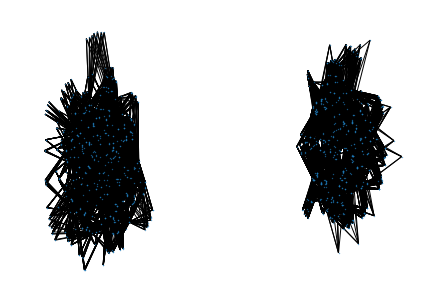